> **Họ và tên**: Đoàn Đặng Phương Nam <br> 
> **Lớp**: 22CLC02 <br>
> **MSSV**: 22127280 <br>
> **Môn học**: Toán ứng dụng và thống kê

<center>

### **ĐỒ ÁN CHÉO HOÁ MA TRẬN**

</center>

**Câu hỏi**

**1\) Trình bày giải thuật chéo hóa ma trận**

**2\) Chéo hóa ma trận**

Sử dụng theo các chương trình đã thực hiện tại giờ Lab để viết thành 1 chương trình chéo hóa ma trận, với $A$ là ma trận vuông. Sinh viên có thể sử dụng các thư viện được giới thiệu như trong giờ Lab để hỗ trợ.

**3\) Kiểm tra kết quả câu 2**

Sử dụng các bài tập ở **Câu 1** trong **file bài tập về chéo hóa** để thử lại chương trình đã viết trong câu 2.

**4\) Ứng dụng**

Tìm hiểu và trình bày 1 ứng dụng của chéo hóa.

Viết chương trình minh họa cho ứng dụng có sử dụng phần chéo hóa (dùng chương trình ở câu số 2 để sử dụng).

**YÊU CẦU**
+ Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb).
+ Thí sinh nộp tập tin gồm .ipynb và .pdf lên Moodle.

**Ở phần đầu của file** cần có phần giới thiệu thông tin cá nhân: Họ tên, MSSV, lớp;

Ghi chú ý nghĩa của từng hàm (mỗi hàm 1 lần, tại nơi đầu tiên xuất hiện hàm).

**QUY ĐỊNH**

Thí sinh bị 0 điểm trong các trường hợp sau:
+ Nộp sai qui định;
+ Thực thi mã nguồn báo lỗi;
+ Chép bài của thí sinh khác hoặc cho thí sinh khác chép bài.
+ Và các hình thức kỷ luật khác theo qui chế thi

## **1. Trình bày giải thuật**

Chéo hoá ma trận (Diagonalization) đối với 1 ma trận vuông $A$ cấp $n$ bất kỳ là quá trình tìm ra 1 **ma trận đường chéo** $D$ (nếu có) thoả $A = PDP^{-1}$, $P$ là một **ma trận nghịch đảo**.

Giả sử ta có một ma trận vuông $A = (a_{ij}) \in M_n(\mathbb{R})$ và ta cần chéo hoá ma trận này, khi đó, thuật toán tìm sẽ gồm các bước như sau:

> **Bước 1**. Giải phương trình $det(A - \lambda I_n) = 0$, tìm ra $k$ nghiệm đôi một phân biệt nhau $x_1, x_2, ..., x_k$ ($k < n$) của phương trình này. <br>
> **Bước 2**. Với mỗi nghiệm $x_i$, giải phương trình $(A - x_iI_n)v = 0$ để tìm một cơ sở trong không gian nghiệm của phương trình <br>
> **Bước 3**. Gom tất cả các vector trong các cơ sở tìm được ở **Bước 2** theo thứ tự từ $x_1$ đến $x_k$ lại thành 1 bộ vector.
> + Nếu bộ đó có ít hơn $n$ vector, trả về kết quả là **không thể chéo hoá ma trận**
> + Nếu bộ đó có đúng $n$ vector, chuyển sang **Bước 4** 
>
> **Bước 4**. Gọi $n$ vector tìm được trong bộ vector ở **Bước 3** là $v_1, v_2, ..., v_n$, kết luận **ma trận $A$ chéo hoá được**, đồng thời trả về 2 ma trận $D$ và $P$ như sau:
> <center>
>
> $D = \begin{bmatrix}
x_1 & 0 & \cdots & 0 \\
0 & x_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & x_n
\end{bmatrix}
$, 
$P = 
\begin{bmatrix}
v_1 & v_2 & \cdots & v_n
\end{bmatrix}$
>
> </center>

## **2. Import những thư viện cần thiết**

In [2]:
#Import necessary libraries
from sympy import Rational, Matrix, symbols, Expr, eye, Poly
import numpy as np
from IPython.display import display, Markdown

## **3. Xây dựng những hàm hỗ trợ**

In [3]:
#Support functions
def isZero (x) -> bool:
    """
    Because we are manipulating on float, so in many contexts, an equation can be theorically 0,
    but the representation of the equation on computer is just close to 0
    
    So this function is created to handle these contexts
    """
    return abs(x) < 1e-4

def to_fraction(element):
    """
    This function transforms a decimal number into a fraction, if it's a rational number
    """
    return Rational(element).limit_denominator(100)

def determinant (matrix: Matrix) -> Expr:
    """
    This function helps to calculate the determinant of a matrix
    """
    def getCofactors (matrix: Matrix, row: int, col: int) -> Matrix:
        """
        This function helps to get a submatrix from the given matrix after removing elements in the given row and column (Cofactor)
        """
        return Matrix([[matrix[i, j] for j in range (matrix.shape[1]) if j != col]
                        for i in range (matrix.shape[0]) if i != row])
    
    if (matrix.shape[0] != matrix.shape[1]):
        raise Exception ("In the determinant function, the input matrix is not square")
    
    size = matrix.shape[0]
    if (size == 1):
        return matrix[0, 0]
    elif (size == 2):
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    elif (size == 3):
        result = matrix[0, 0] * (matrix[1, 1] * matrix[2, 2] - matrix[1, 2] * matrix[2, 1])
        result = result - matrix[0, 1] * (matrix[1, 0] * matrix[2, 2] - matrix[1, 2] * matrix[2, 0])
        result = result + matrix[0, 2] * (matrix[1, 0] * matrix[2, 1] - matrix[1, 1] * matrix[2, 0])
        
        return result
    
    result = 0
    for col in range (size):
        result += ((-1) ** col) * matrix[0, col] * determinant(getCofactors(matrix, 0, col))
        
    return result
    
def eigenvalues (matrix: Matrix) -> list[float]:
    """
    This function helps to calculate all eigenvalues of a matrix (should use with matrices have all real eigenvalues)
    
    In this function, we first get all coefficients of the expression obtained from calculating det(A - xI)
    Then I used np.roots, and handled computing errors before getting distinct eigenvalues for calculating eigenvectors afterthat.
    """
    if (matrix.shape[0] != matrix.shape[1]):
        raise Exception ("In the eigenvalues function, the input matrix is not square")
    
    size = matrix.shape[0]
    X = symbols('x')
    I = eye(size)
    
    equation = determinant(matrix - X * I)
    expression = Poly(equation, X)
    coefficients = expression.all_coeffs()
    
    temp = np.roots(coefficients)
    solution = []
    for element in temp:
        real = element.real
        imag = element.imag
        
        if (isZero(real - int(real))):
            real = int(real)
        elif (isZero(int(real) + 1 - real)):
            real = int(real) + 1
        elif (isZero(int(real) - 1 - real)):
            real = int(real) - 1
            
        if (isZero(imag - int(imag))):
            imag = int(imag)
        elif (isZero(int(imag) + 1 - imag)):
            imag = int(imag) + 1
        elif (isZero(int(imag) - 1 - imag)):
            imag = int(imag) - 1
            
        if (imag == 0):
            solution.append(real)
        else:
            solution.append(complex(real, imag))
            
    return list(set(solution))

def eigenvectors (matrix: Matrix, listEigenvalues: list[float]):
    """
    This function helps to find all eigenvectors of a matrix.
    I added the parameter eigenvalues because the eigenvalues were found before finding eigenvectors, and without adding it, 
    we will find eigenvalues again in this function -> Should be added.
    """
    if (matrix.shape[0] != matrix.shape[1]):
        raise Exception ("In the eigenvectors function, the input matrix is not square")
    
    listEigenvectors = []
    size = matrix.shape[0]
    I = eye(size)
    
    for eigenvalue in listEigenvalues:
        tempMatrix = (matrix - eigenvalue * I).echelon_form()
        temp = []
        for i in range (tempMatrix.shape[0]):
            tempRow = []
            
            for j in range (tempMatrix.shape[1]):
                if (isZero(tempMatrix[i, j])):
                    tempRow.append(0)
                else:
                    tempRow.append(tempMatrix[i, j])
                    
            temp.append(tempRow)
        tempMatrix = Matrix(temp)
        
        listEigenvectors += [(vector, eigenvalue) for vector in tempMatrix.nullspace()]
    
    return listEigenvectors
    
def Diagonalization_Result_In_Markdown_Text (A: Matrix, P: Matrix, D: Matrix, P_Inv: Matrix):
    """
    This function helps to write the result of eigendecomposition in Markdown text, then use display function and Markdown class
    of IPython.display to print this Markdown text
    """
    def Matrix_Markdown (matrix: Matrix):
        text = "$\n\\begin{bmatrix}\n"
        for row in range (matrix.shape[0]):
            for col in range (matrix.shape[1]):
                value = to_fraction(matrix[row, col])
                square_value = to_fraction(matrix[row, col] * matrix[row, col])
                if (isinstance(value, Rational) and isZero(matrix[row, col] * value.denominator - value.numerator)):
                    if (value.denominator != 1):
                        text += ("-" if matrix[row, col] < 0 and value.numerator != 0 else "") + "\\frac" + "{" + f"{abs(value.numerator)}" + "}{" + f"{value.denominator}" + "}"
                    else:
                        text += ("-" if matrix[row, col] < 0 and value.numerator != 0 else "") + f"{abs(value.numerator)}"
                elif (isinstance(square_value, Rational) and isZero(matrix[row, col] * matrix[row, col] * square_value.denominator - square_value.numerator)):
                    if (square_value.denominator != 1):
                        text += ("-" if matrix[row, col] < 0 and value.numerator != 0 else "") + "\\sqrt" + "{" + "\\frac" + "{" + f"{square_value.numerator}" + "}{" + f"{square_value.denominator}" + "}"+ "}"
                    else:
                        text += ("-" if matrix[row, col] < 0 and value.numerator != 0 else "") + "\\sqrt" + "{" + f"{square_value.numerator}" + "}"
                else:
                    text += f"{matrix[row, col]}"
                    
                if (col != matrix.shape[1] - 1):
                    text += " & "
                else:
                    text += " \\\\ \n"  
        
        text += "\end{bmatrix}\n$"
        
        return text
    
    text = Matrix_Markdown(A)  
    text += "\n $=$\n"
    text += Matrix_Markdown(P)
    text += " \n"
    text += Matrix_Markdown(D)
    text += " \n"
    text += Matrix_Markdown(P_Inv)
    
    return text

## **4. Xây dựng giải thuật chéo hoá**

In [4]:
def diagonalize (matrix: Matrix) -> tuple[Matrix, Matrix]:
    """
    This function helps to diagonalize a matrix
    """
    if (matrix.shape[0] != matrix.shape[1]):
        raise Exception ("In the diagonalize function, the input matrix is not square")
    
    size = matrix.shape[0]
    
    #! Find all eigenvalues of the matrix
    listEigenvalues = eigenvalues(matrix)
    
    #! Find all eigenvectors of the matrix
    listEigenvectors = eigenvectors(matrix, listEigenvalues)
    
    if (len(listEigenvectors) != size):
        return None
    
    P = Matrix([[listEigenvectors[i][0][j] for i in range (size)] for j in range(size)])
    D = Matrix([[int(i == j) * listEigenvectors[i][1] for j in range (size)] for i in range (size)])
    
    return P, D

## **5. Kiểm tra chương trình**

In [5]:
C1 = [[-1, 3],
      [2, 4]]

C2 = [[5, 2],
      [9, 2]]

C3 = [[1, -1, -1],
      [1, 3, 1], 
      [-3, 1, -1]]

C4 = [[5, -1, 1],
      [-1, 2, -2],
      [1, -2, 2]]

C5 = [[1, 3, 3],
      [-3, -5, -3],
      [3, 3, 1]]

C6 = [[4, 0, -1],
      [0, 3, 0],
      [1, 0, 2]]

C7 = [[3, 4, -4],
      [-2, -1, 2],
      [-2, 0, 1]]

C8 = [[0, 0, -2],
      [1, 2, 1],
      [1, 0, 3]]

C9 = [[1, 0, 0],
      [1, 2, 0],
      [-3, 5, 2]]

C10 = [[4, 0, 1],
       [-2, 1, 0],
       [-2, 0, 1]]

testList = [C1, C2, C3, C4, C5, C6, C7, C8, C9, C10]

In [6]:
for i, test in enumerate(testList):
    print(f"Câu {i + 1}:")
    
    result = diagonalize(Matrix(test))
    if (result is None):
        print("Defective matrix")
    else:
        P, D = result

        text = Diagonalization_Result_In_Markdown_Text(Matrix(test), P, D, P.inv())
        display(Markdown(text))

Câu 1:


$
\begin{bmatrix}
-1 & 3 \\ 
2 & 4 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
\frac{1}{2} & -3 \\ 
1 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
5 & 0 \\ 
0 & -2 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
\frac{2}{7} & \frac{6}{7} \\ 
-\frac{2}{7} & \frac{1}{7} \\ 
\end{bmatrix}
$

Câu 2:


$
\begin{bmatrix}
5 & 2 \\ 
9 & 2 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
\frac{2}{3} & -\frac{1}{3} \\ 
1 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
8 & 0 \\ 
0 & -1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & \frac{1}{3} \\ 
-1 & \frac{2}{3} \\ 
\end{bmatrix}
$

Câu 3:


$
\begin{bmatrix}
1 & -1 & -1 \\ 
1 & 3 & 1 \\ 
-3 & 1 & -1 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
-1 & -1 & \frac{1}{4} \\ 
0 & 1 & -\frac{1}{4} \\ 
1 & 1 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
2 & 0 & 0 \\ 
0 & 3 & 0 \\ 
0 & 0 & -2 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
-1 & -1 & 0 \\ 
\frac{1}{5} & 1 & \frac{1}{5} \\ 
\frac{4}{5} & 0 & \frac{4}{5} \\ 
\end{bmatrix}
$

Câu 4:


$
\begin{bmatrix}
5 & -1 & 1 \\ 
-1 & 2 & -2 \\ 
1 & -2 & 2 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
0 & -1 & 2 \\ 
1 & -1 & -1 \\ 
1 & 1 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
0 & 0 & 0 \\ 
0 & 3 & 0 \\ 
0 & 0 & 6 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
0 & \frac{1}{2} & \frac{1}{2} \\ 
-\frac{1}{3} & -\frac{1}{3} & \frac{1}{3} \\ 
\frac{1}{3} & -\frac{1}{6} & \frac{1}{6} \\ 
\end{bmatrix}
$

Câu 5:


$
\begin{bmatrix}
1 & 3 & 3 \\ 
-3 & -5 & -3 \\ 
3 & 3 & 1 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
1 & -1 & -1 \\ 
-1 & 1 & 0 \\ 
1 & 0 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & -2 & 0 \\ 
0 & 0 & -2 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & 1 & 1 \\ 
1 & 2 & 1 \\ 
-1 & -1 & 0 \\ 
\end{bmatrix}
$

Câu 6:
Defective matrix
Câu 7:


$
\begin{bmatrix}
3 & 4 & -4 \\ 
-2 & -1 & 2 \\ 
-2 & 0 & 1 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
0 & -1 & 1 \\ 
1 & 1 & 0 \\ 
1 & 1 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 3 & 0 \\ 
0 & 0 & -1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & 2 & -1 \\ 
-1 & -1 & 1 \\ 
0 & -1 & 1 \\ 
\end{bmatrix}
$

Câu 8:


$
\begin{bmatrix}
0 & 0 & -2 \\ 
1 & 2 & 1 \\ 
1 & 0 & 3 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
-2 & 0 & -1 \\ 
1 & 1 & 0 \\ 
1 & 0 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 2 & 0 \\ 
0 & 0 & 2 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
-1 & 0 & -1 \\ 
1 & 1 & 1 \\ 
1 & 0 & 2 \\ 
\end{bmatrix}
$

Câu 9:
Defective matrix
Câu 10:


$
\begin{bmatrix}
4 & 0 & 1 \\ 
-2 & 1 & 0 \\ 
-2 & 0 & 1 \\ 
\end{bmatrix}
$
 $=$
$
\begin{bmatrix}
0 & -\frac{1}{2} & -1 \\ 
1 & 1 & 1 \\ 
0 & 1 & 1 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 2 & 0 \\ 
0 & 0 & 3 \\ 
\end{bmatrix}
$ 
$
\begin{bmatrix}
0 & 1 & -1 \\ 
2 & 0 & 2 \\ 
-2 & 0 & -1 \\ 
\end{bmatrix}
$

## **6. Ứng dụng của chéo hoá: PCA và giảm chiều dữ liệu**

Một trong những điểm thú vị của giải thuật chéo hoá chính là ý tưởng của nó trong các vấn đề ứng dụng, một trong số những ứng dụng tiêu biểu đó chính là giải thuật **PCA (Principal Component Analysis)**, được đề xuất bởi 2 nhà toán học Pearson (1901) và Hotelling (1933). 

Giải thuật này góp phần quan trọng vào việc **giảm chiều dữ liệu** mà **không làm mất quá nhiều thông tin**, là một bước rất quan trọng trong khâu **tiền xử lý dữ liệu (Data Preprocessing)** để có thể **tránh trực tiếp làm việc với dữ liệu lớn nhiều chiều** mà vẫn có thể đảm bảo độ chính xác của mô hình và có thể **trực quan hoá dữ liệu**. 

Ngoài ra, **PCA** cũng được dùng trong nhiều ứng dụng khác như: Nén dữ liệu, giảm nhiễu, ... 

Nói về sự liên quan giữa **PCA** và **chéo hoá**, chúng ta xét 1 bộ dữ liệu $X = \{x_1, x_2, ..., x_N\}, x_n \in \mathbb{R}^D$ với trung bình $\mu$. khi đó, **ma trận hiệp phương sai** của dữ liệu sẽ là:

<center>

$$S = \frac{1}{N} \sum_{n = 1}^{N} (x_n - \mu)(x_n - \mu)^T$$

</center>

Hơn thế nữa, giả sử rằng tồn tại 1 **ma trận chiếu (projection matrix)** $B = \begin{bmatrix} b_1 & b_2 & \cdots & b_m \end{bmatrix} \in \mathbb{R}^{M x D}$ sao cho với mỗi $x_n$, ta có: $z_n = B^Tx_n$ là toạ độ của $x_n$ trên mặt phẳng M chiều tạo bởi M vector $b_1, b_2, ..., b_m$. Đồng thời, ta cũng giả sử rằng $B$ là **ma trận trực giao**.

Ta đã biết **PCA** là môt thuật toán giảm chiều dữ liệu nhưng vẫn cố gắng giữ lại càng nhiều thông tin càng tốt. Việc giữ lại càng nhiều thông tin khi đã chiếu dữ liệu lên một không gian ít chiều hơn có thể đưa bài toán **PCA** trở về với vấn đề sau: **Làm sao để chọn được ma trận $B$ sao cho tổng phương sai của dữ liệu trên mặt phẳng chiếu là lớn nhất**, hay nói cách khác, *sự mất mát về tổng phương sai dữ liệu so với dữ liệu ban đầu là nhỏ nhất*. Ở đây, ta sẽ nhìn bài toán **PCA** theo góc nhìn thứ nhất: **tối đa hoá phương sai dữ liệu trên mặt phẳng ít chiều hơn**, tức là tối đa hoá $\mathbb{V}[Z]$

Ta có thể giả sử rằng giá trị trung bình $\mu = 0$, lý do là vì:

<center>

$\mathbb{V}[Z] = \mathbb{V}[B^T(X - \mu)] = \mathbb{V}[B^TX - B^T\mu] = \mathbb{V}[B^TX]$

</center>

Điều này chứng tỏ rằng giá trị $\mathbb{V}[Z]$ không phụ thuộc vào $\mu$, nên ta có thể giả sử $\mu = 0$ để:

<center>

$\mathbb{E}[Z] = \mathbb{E}[B^TX] = \mathbb{E}[B^T]\mu = 0$

</center>

tức giá trị trung bình của dữ liệu là như nhau khi chiếu trên các không gian khác nhau.

Tại chương 10, mục 10.2 của nguồn tham khảo $^{[3]}$ có đề cập đến mối liên quan giữa **chéo hoá** và sự cực đại hoá của giá trị tổng phương sai. Kết quả thu được có thể được phát biểu ngắn gọn là:

> Để tìm $max\mathbb{V}[Z]$, các vector $b_1, b_2, ..., b_M$ của ma trận B sẽ là các **vector riêng** tương ứng với $M$ **trị riêng lớn nhất** $\lambda_1, \lambda_2, ..., \lambda_M$ của **ma trận hiệp phương sai** $S$. Các vector này thu được sau khi **chéo hoá trực giao** ma trận $S$ (vì $S$ là **ma trận đối xứng**). Đồng thời, 

<center>

$$max\mathbb{V}[Z] = \sum_{i = 1}^{M} \lambda_i$$

</center>

Từ kết quả này, ta thấy rằng **tỷ lệ giữ thông tin tối đa** khi chiếu dữ liệu lên không gian ít chiều hơn sẽ là:

<center>

$$\frac{\sum_{i = 1}^{M} \lambda_i}{\sum_{i = 1}^{D} \lambda_i}$$

</center>

Điều lưu ý cuối cùng Khi triển khai thuật toán đối với 1 tập dữ liệu bất kỳ đó là việc **chuẩn hoá (normalize)** dữ liệu, đối với thuật toán **PCA**, thông thường ta sẽ chuẩn hoá bằng cách gán:

<center>

$X \leftarrow \frac{X - \mu}{\sigma}$

</center>

nhằm đưa dữ liệu về dạng chuẩn với trung bình là $\mathbb{0}$ và độ lệch chuẩn là $\mathbb{1}$

Phía dưới phần trình bày là code của em dựa trên những gì em trình bày, đồng thời, em cũng sử dụng bộ **data Iris** của thư viện *scikit-learn* để test (tham khảo nguồn $^{[1]}$) và **trực quan hoá 3D** đối với dữ liệu sau khi giảm chiều (tham khảo nguồn $^{[2]}$)

In [74]:
class PCA:
    def __init__ (self, numComponents: int):
        self.numComponents = numComponents
        self.eigenvalues = None
        self.eigenvectors = None
        self.D = None
        
    def fit_transform (self, data: np.array):
        """
        This function helps to fit the data into the PCA model for dimensionality reduction
        Then, the data will be transform as a projection data on a subspace M-dimensions, M is the number of principal components
        
        The data should be a N x D matrix
        N: Number of samples
        D: Number of features
        """
        def orthogonallyDiagonalize (symmetricMatrix: np.array):
            P, D = diagonalize(Matrix(symmetricMatrix))
            P, D = np.array(P), np.array(D)
            
            Q, _ = np.linalg.qr(P)
            
            listEigenvalues = np.array([D[i, i] for i in range (len(D))])
            listEigenvectors = Q.T
            
            return listEigenvalues, listEigenvectors
        
        #! Copy the data
        X = np.copy(data)
        
        #! Get the number of features and samples
        N = len(X)
        D = len(X[0])
        self.D = D
        
        #! Standardization
        mean = sum(X) / N
        standardDeviation = (sum((X - mean) ** 2) / N) ** 0.5
        X_standard = ((X - mean) / standardDeviation).T
        
        #! Get the data covariance matrix
        covarianceMatrix = (X_standard @ X_standard.T) / N
        
        #! Diagonalize the covariance matrix, get eigenvalues and corresponding eigenvectors and rearrange them
        eigenvalues, eigenvectors = orthogonallyDiagonalize(covarianceMatrix)
        
        eigen_pairs = [(eigenvalues[i], eigenvectors[i]) for i in range (len(eigenvalues))]
        eigen_pairs.sort(key = lambda x: x[0], reverse = True)
        
        self.eigenvalues = np.array([float(pair[0]) for pair in eigen_pairs])
        self.eigenvectors = np.array([np.array(pair[1]) for pair in eigen_pairs])
        
        #! Choose principal components and get the projection matrix
        principalComponents = self.eigenvectors[:min(self.numComponents, D)]
        projectionMatrix = principalComponents.T
        
        #! Return the data after dimensionality reduction
        transformedData = X_standard.T @ projectionMatrix
        return transformedData
    
    def ratio_captured_info (self):
        """
        This function helps to calculate the rate of information captured after dimensionality reduction
        """
        if (self.eigenvalues is None):
            raise Exception ("Please fit the data into the class PCA")
        
        return np.sum(self.eigenvalues[:min(self.numComponents, self.D)]) / np.sum(self.eigenvalues)

In [75]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

print("X_shape:", X.shape)

X_shape: (150, 4)


In [76]:
pca = PCA(numComponents = 3)
X_proj = pca.fit_transform(X)

print("X_projected shape:", X_proj.shape)

X_projected shape: (150, 3)


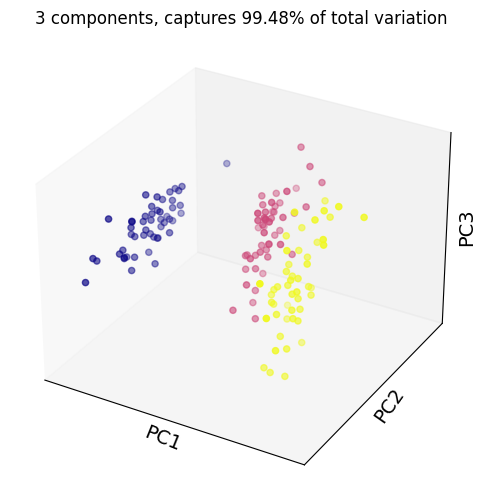

In [77]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (6,6))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2], c = y, cmap = 'plasma')

axis.set_xlabel("PC1", fontsize = 14, labelpad = -12, rotation = -22)
axis.set_xticks([])
axis.set_ylabel("PC2", fontsize = 14, labelpad = -12, rotation = 55)
axis.set_yticks([])
axis.set_zlabel("PC3", fontsize = 14, labelpad = -12, rotation = 90)
axis.set_zticks([])

axis.set_title(f"3 components, captures {pca.ratio_captured_info().round(4) * 100}% of total variation");

## **7. Tài liệu tham khảo**
[1] [Geeksforgeeks - Implementing PCA in Python with scikit-learn](https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/)

[2] [Alireza Bagheri - PCA from sratch](https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/?fbclid=IwZXh0bgNhZW0CMTEAAR1PfukN5FYg1q6SEb2vIGE4gnJJXpNnrlWpSdrgLOyBeaWEcPGgSMocaxo_aem_T1okyyA24PcCmFirA9gQcg)

[3] [Marc Peter Deisenroth - A. Aldo Faisal - Cheng Soon Ong - Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)